## Decision Trees

In this task we will use the most famous Iris dataset to do the analysis and build a decision tree model on the data.

In [93]:
# Import the data
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# Import the data
iris = datasets.load_iris()

iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [8]:
# print the data
iris.data[:5]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

So, this is how our data looks like.

In [10]:
# Create a dataframe
df = pd.DataFrame(iris.data, columns= iris.feature_names)
print(df.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [12]:
# Print the class labels

y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Exploratory data analysis

In [24]:
# Print the shape
df.shape

(150, 4)

In [25]:
# Get the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


There is no null value in our dataset.

In [52]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
sns.set()

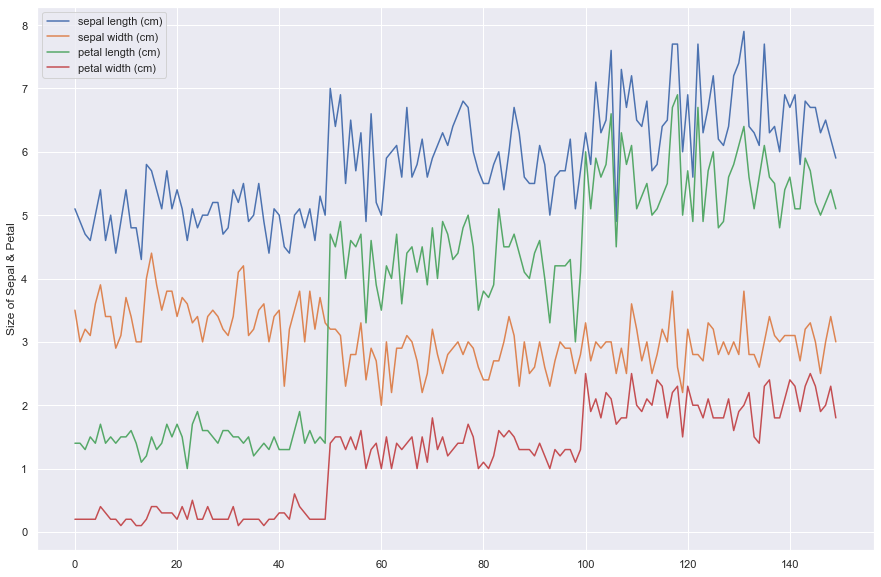

In [53]:
# plotting all the features
df.plot()
plt.ylabel("Size of Sepal & Petal")
plt.show()

In [55]:
# Average length and width
lenwid = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']].mean()
lenwid

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

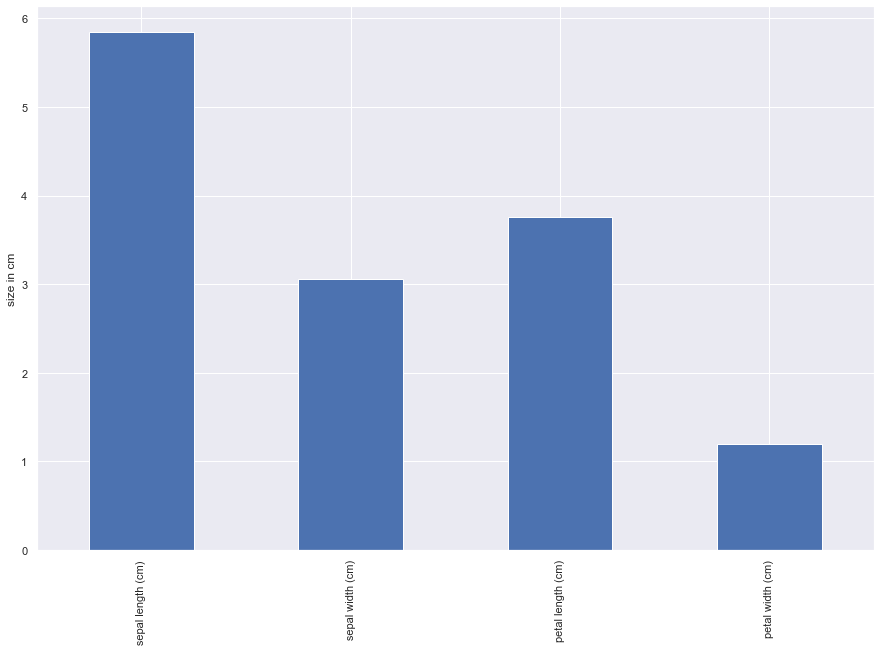

In [54]:
#Average length and width of petals and sepals
lenwid.plot(kind="bar")
plt.ylabel("size in cm")
plt.show()

In [35]:
df.columns[:4]

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

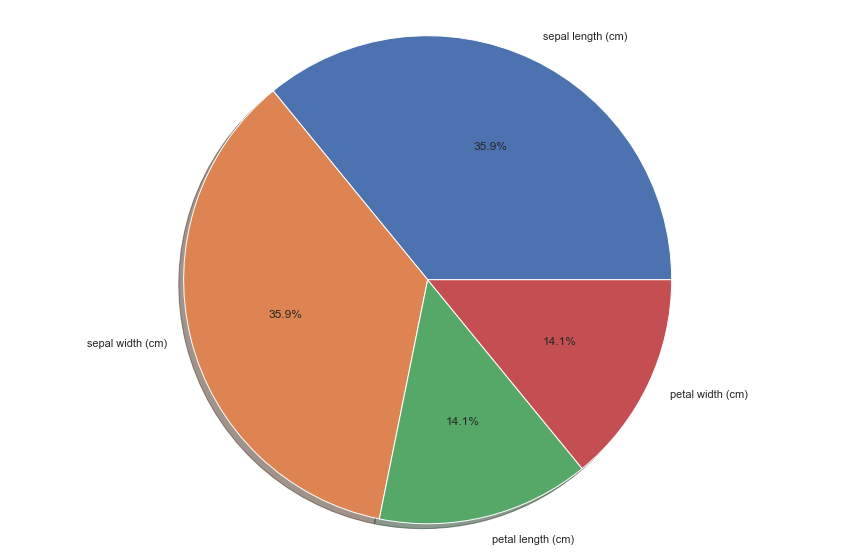

In [61]:
# pie chart of workers
labels = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']
sizes = [df['sepal width (cm)'].mean(),
         df['sepal width (cm)'].mean(),
         df['petal width (cm)'].mean(),
         df['petal width (cm)'].mean()

        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

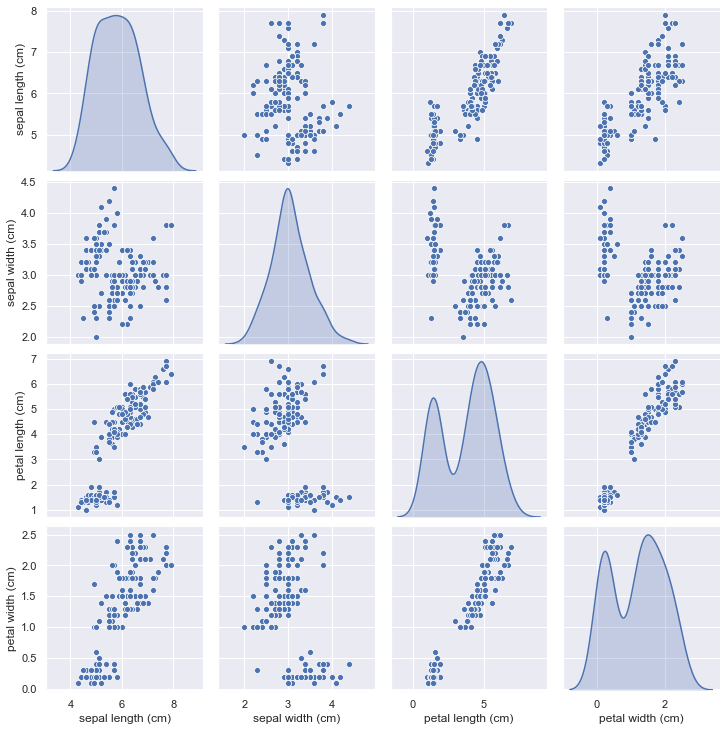

In [67]:
sns.pairplot(df, diag_kind='kde')
plt.show()

We can see that sepal length and sepal widgth is normally distributed which increases the accuracy of the model.

## Model Building
Now let us build a decision tree classifier model using the iris dataset.

In [73]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25)

In [74]:
# Instantiate the model
clf = DecisionTreeClassifier()

# Fitting on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
# make prediction
y_pred = clf.predict(X_test)
y_pred[:5]

array([2, 0, 2, 0, 2])

In [83]:
# Create a dataframe of actual and predicted values
df_predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_predictions

,Actual,Predicted
0,2,2
1,0,0
2,2,2
3,0,0
4,2,2
5,0,0
6,1,1
7,2,2
8,0,0
9,1,1


In [92]:
# print the accuracy score

print("Accuracy score: ",round((clf.score(X_test, y_test)*100),2), "%")

Accuracy score:  97.37 %


In [95]:
# Print the confusin matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 17]], dtype=int64)

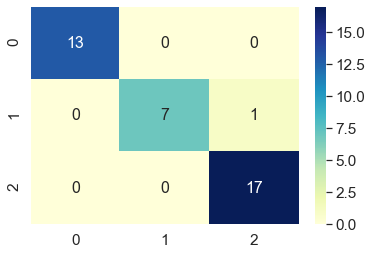

In [100]:
# Visualizing the confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,annot_kws={"size": 16},cmap="YlGnBu")
plt.show()

Our Decision tree model performed very well on the test dataset. It failed to classify only one data point.

## Visualize Decision trees to understand it better

In [69]:
# Install required libraries
#!pip install pydotplus
#!apt-get install graphviz -y

In [108]:
!pip install graphviz

In [124]:
# Import libraries for creating a decision tree map
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

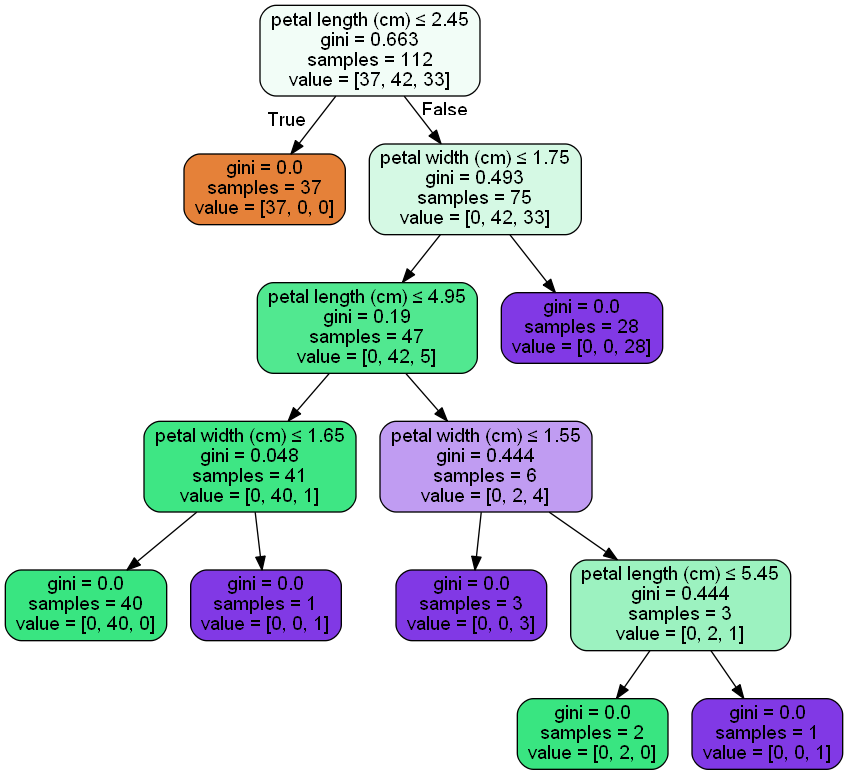

In [133]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\ankit\anaconda3\pkgs\graphviz-2.38.0-h6538335_1011\Library\bin\graphviz'
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

##### Here we would conclude our task!